# <center> Chocolate ratings EDA</center>

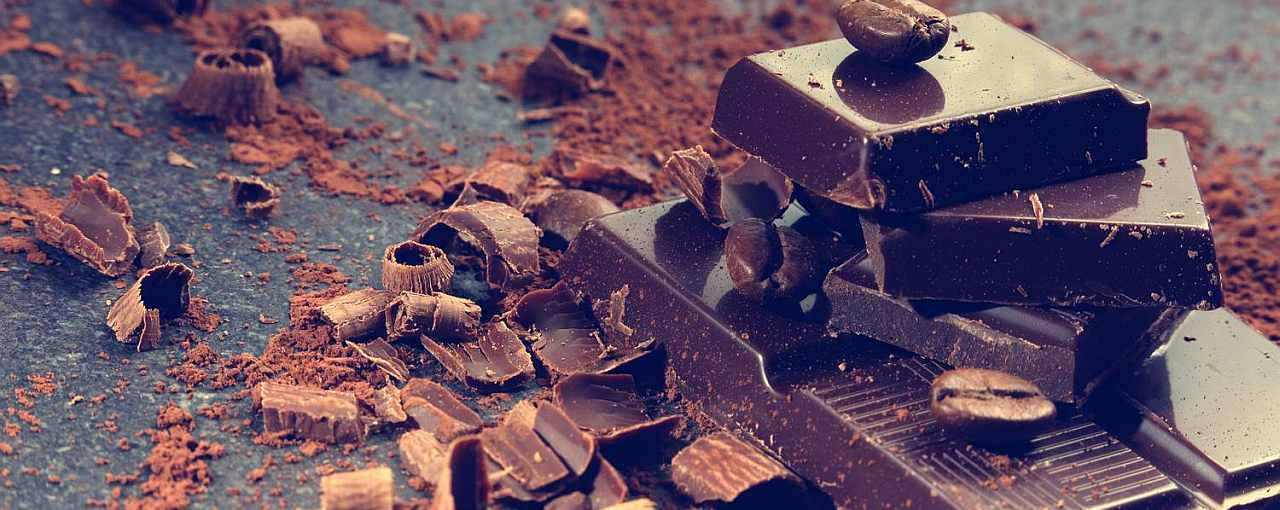

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
%matplotlib inline
sns.set()

In [2]:
# loading dataframe chocolate.csv into df
df = pd.read_csv('chocolate.csv')

In [3]:
# viewing first five records of dataset df
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [4]:
# let's rename the columns 
df.columns = ['company','barName','ref','reviewYear','cocoaPercent','location','rating','beanType','beanOrigin']
df.head()

,company,barName,ref,reviewYear,cocoaPercent,location,rating,beanType,beanOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


In [5]:
# let's get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       1500 non-null   object 
 1   barName       1500 non-null   object 
 2   ref           1500 non-null   int64  
 3   reviewYear    1500 non-null   int64  
 4   cocoaPercent  1500 non-null   object 
 5   location      1500 non-null   object 
 6   rating        1500 non-null   float64
 7   beanType      1499 non-null   object 
 8   beanOrigin    1499 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 105.6+ KB


**We see above the dataset contains total 1500 records and 9 columns and three types of datatypes we have int64,float64 and object. Also the number of missing data if we have.**

### Handling missing data

In [6]:
# let's observe the dataset to see if we really don't have missing data
df

,company,barName,ref,reviewYear,cocoaPercent,location,rating,beanType,beanOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia
...,...,...,...,...,...,...,...,...,...
1495,Dick Taylor,Ecuador,769,2011,70%,U.S.A.,3.25,,Ecuador
1496,Zotter,"Indianer, Raw",883,2012,58%,Austria,3.50,,
1497,Guido Castagna,Blend,355,2009,64%,Italy,3.25,,"Ven, Trinidad, Ecuador"
1498,Willie's Cacao,Hacienda Las Trincheras,593,2010,72%,U.K.,3.50,,Venezuela


In [7]:
#we have a lot of missing data in beanType column but we don't get that much number of missing data,
#it means there's some data. let's check it by displaying the data from origin column at index 1
df.beanOrigin[1]

'\xa0'

**So we have data there but it seems like as if it's empty. Let's make these null**

In [8]:
df.replace('\xa0', np.nan, inplace=True) #it replaces wherethere is found in whole dataset

In [9]:
#let's see how much data we have missing now
df.isnull().sum()

company           0
barName           0
ref               0
reviewYear        0
cocoaPercent      0
location          0
rating            0
beanType        751
beanOrigin       62
dtype: int64

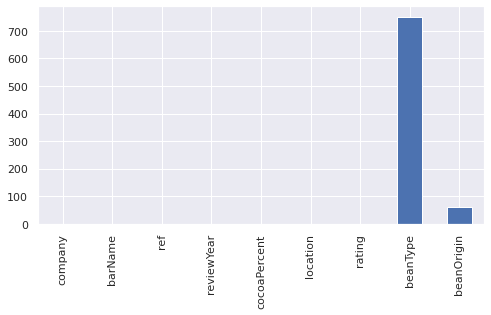

In [10]:
# let's visualize the missing data
plt.figure(figsize=(8,4))
df.isnull().sum().plot.bar()
plt.show()

**Almost half of data is missing in beanType column and 62 missing in origin column. let's deal with them**

In [11]:
# filling the missing values with most frequent values in beanType and origin column 
df.beanType.fillna(df.beanType.mode()[0], inplace=True)
df.beanOrigin.fillna(df.beanOrigin.mode()[0], inplace=True)

In [12]:
# checking missing values if remaining
df.isnull().sum()

company         0
barName         0
ref             0
reviewYear      0
cocoaPercent    0
location        0
rating          0
beanType        0
beanOrigin      0
dtype: int64

In [13]:
df.head()

,company,barName,ref,reviewYear,cocoaPercent,location,rating,beanType,beanOrigin
0,Valrhona,Manjari,129,2007,64%,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,80%,Switzerland,3.25,Blend,Venezuela
2,Potomac,Upala w/ nibs,647,2011,70%,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,70%,U.S.A.,3.50,Trinitario,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,65%,Colombia,3.50,CCN51,Colombia


**In cocoaPercent column we have % with data so need to remove it and change it's datatype from string to float**

In [14]:
df.cocoaPercent=df.cocoaPercent.str.replace('%','')
df.cocoaPercent=df.cocoaPercent.astype('float64')
df.cocoaPercent = (df.cocoaPercent.values)/100
df.head()

,company,barName,ref,reviewYear,cocoaPercent,location,rating,beanType,beanOrigin
0,Valrhona,Manjari,129,2007,0.64,France,4.00,"Criollo, Trinitario",Madagascar
1,Original Beans (Felchlin),"Grand Cru Blend No.1, 5 yr. Anniversary Ed",1442,2014,0.80,Switzerland,3.25,Blend,Venezuela
2,Potomac,Upala w/ nibs,647,2011,0.70,U.S.A.,3.50,Matina,Costa Rica
3,Middlebury,"Matagalpa, Cacao Bisiesto",1538,2015,0.70,U.S.A.,3.50,Trinitario,Nicaragua
4,Carlotta Chocolat,Cesar,1888,2016,0.65,Colombia,3.50,CCN51,Colombia


In [15]:
# change the type of rating to int64
df.rating = df.rating.astype('int64')
df.dtypes

company          object
barName          object
ref               int64
reviewYear        int64
cocoaPercent    float64
location         object
rating            int64
beanType         object
beanOrigin       object
dtype: object

## Summary

In [16]:
# from summmary we get the maximium information about the dataset like number of unique values, data distributioin
# and ranges of data along with their average values
df.describe(include='all')

,company,barName,ref,reviewYear,cocoaPercent,location,rating,beanType,beanOrigin
count,1500,1500,1500.000000,1500.000000,1500.000000,1500,1500.000000,1500,1500
unique,391,893,NaN,NaN,NaN,57,NaN,35,92
top,Soma,Madagascar,NaN,NaN,NaN,U.S.A.,NaN,Trinitario,Venezuela
freq,39,42,NaN,NaN,NaN,632,NaN,1093,236
mean,NaN,NaN,1036.881333,2012.326000,0.715640,NaN,2.795333,NaN,NaN
std,NaN,NaN,554.693828,2.933734,0.062644,NaN,0.546788,NaN,NaN
min,NaN,NaN,5.000000,2006.000000,0.420000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,572.000000,2010.000000,0.700000,NaN,2.000000,NaN,NaN
50%,NaN,NaN,1071.000000,2013.000000,0.700000,NaN,3.000000,NaN,NaN
75%,NaN,NaN,1503.000000,2015.000000,0.750000,NaN,3.000000,NaN,NaN


### Distribution of data and outlieres

**ref**

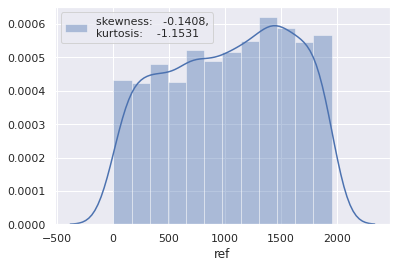

In [17]:
sns.distplot(a=df.ref, label=f'skewness:{df.ref.skew():10.4f},\nkurtosis: {df.ref.kurt():10.4f}')
plt.legend()
plt.show()

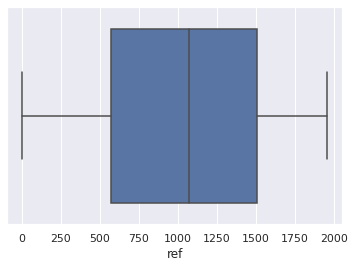

In [18]:
sns.boxplot(df.ref)
plt.show()

**skewness tells that data is very little left skewed and kurtosis tells that there are no outliers becuase the tails are not thin and distribution is flat not peaked**

**reviewYear**

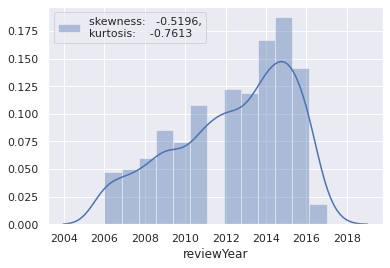

In [19]:
sns.distplot(a=df.reviewYear, label=f'skewness:{df.reviewYear.skew():10.4f},\nkurtosis: {df.reviewYear.kurt():10.4f}')
plt.legend()
plt.show()

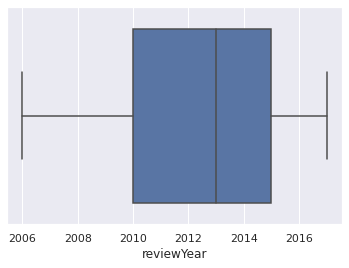

In [20]:
sns.boxplot(df.reviewYear)
plt.show()

**In this column distribution is left skewed more than the average and there are no outliers**

**CocoaPercent**

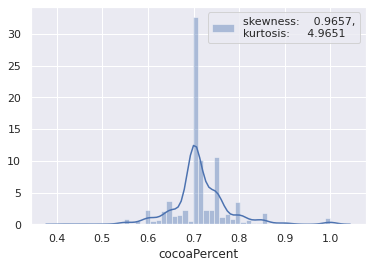

In [21]:
sns.distplot(a=df.cocoaPercent, label=f'skewness:{df.cocoaPercent.skew():10.4f},\nkurtosis: {df.cocoaPercent.kurt():10.4f}')
plt.legend()
plt.show()

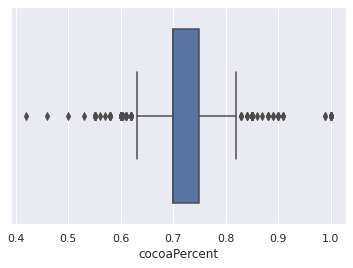

In [22]:
# visualizing the outliers through boxplot
sns.boxplot(x=df.cocoaPercent)
plt.show()

**Cocoa percent in chocolate bars is around 70-80% and the distribution is slightly positively distributed and there are a lot of outliers in the data**

**Data less than 0.53 and more than 0.95 we consider outliers and rest of the data seems to be so close with values so no need to remove them**

In [23]:
df.drop(df[(df.cocoaPercent.values > 0.95) | (df.cocoaPercent.values <= 0.53)].index, inplace=True)

**rating**

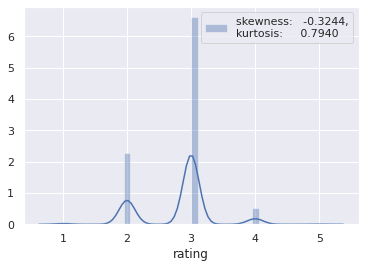

In [24]:
sns.distplot(a=df.rating, label=f'skewness:{df.rating.skew():10.4f},\nkurtosis: {df.rating.kurt():10.4f}')
plt.legend()
plt.show()

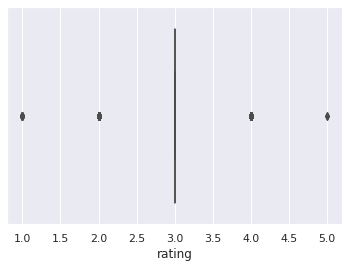

In [25]:
sns.boxplot(x=df.rating)
plt.show()

**Here also distribution is left skewed above average and there are also a few outliers in rating column, let's remove these**

In [26]:
# let's remove the outliers
df.drop(df[(df.rating.values < 2) | (df.rating.values > 4)].index, inplace=True)

In [27]:
df.shape

(1467, 9)

### Correlation

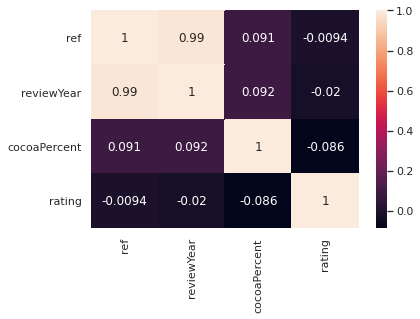

In [28]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

**there are two columns ref and reviewDate which are highly correlated**

### Coca percent and their rating

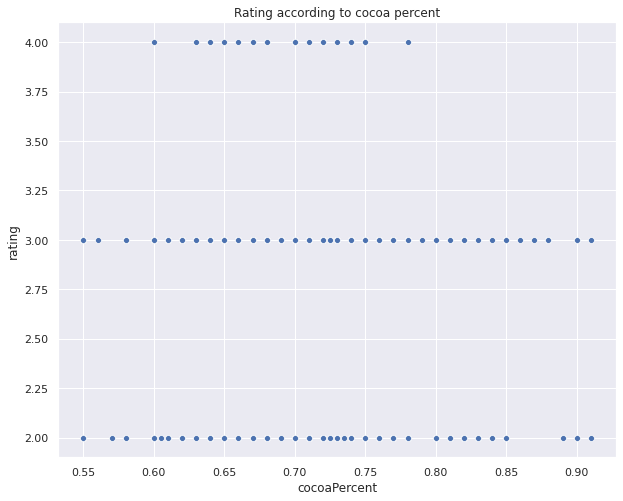

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(df.cocoaPercent,df.rating)
plt.title('Rating according to cocoa percent')
plt.show()

### Origins whose coca beans are most liked

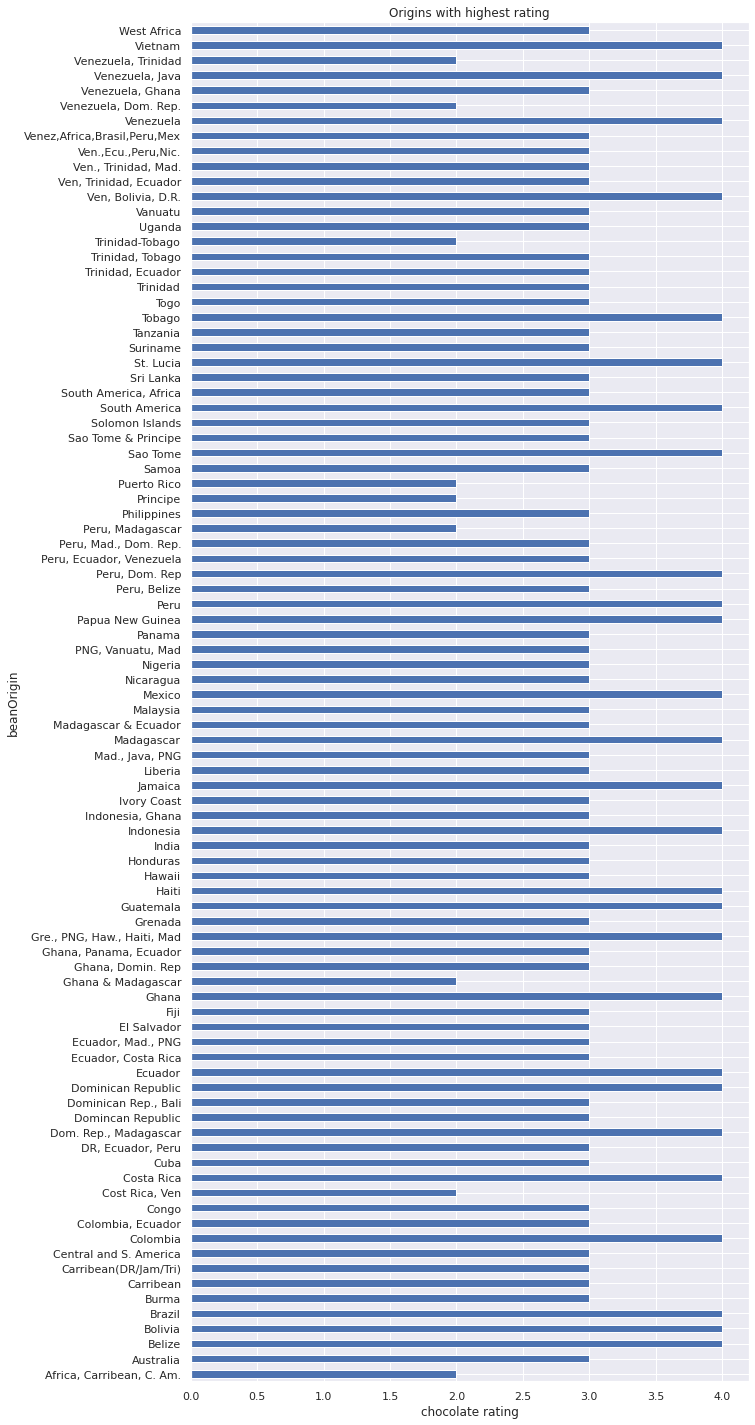

In [30]:
plt.figure(figsize=(10,25))
df.groupby(['beanOrigin'])['rating'].max().plot(kind='barh')
plt.xlabel('chocolate rating')
plt.title('Origins with highest rating')
plt.show()

### Countries with highest Number of vendors

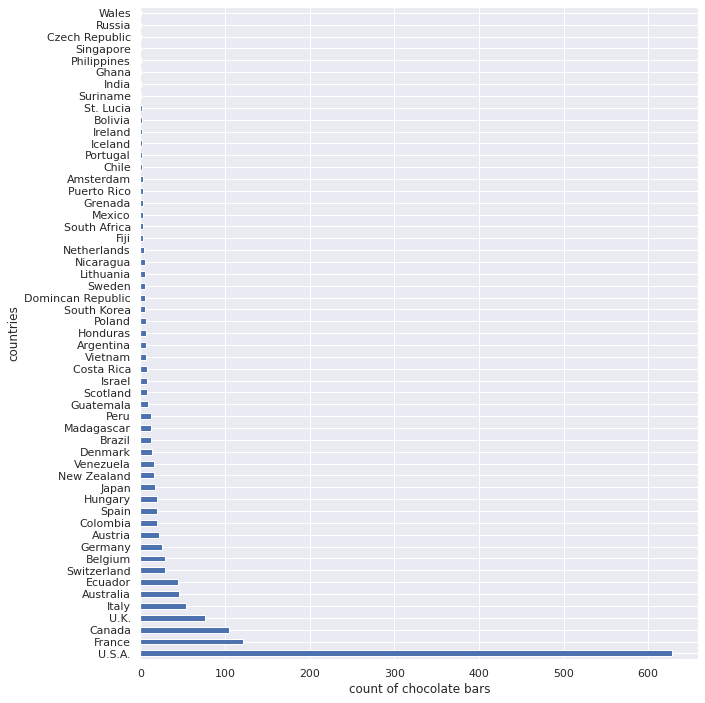

In [31]:
plt.figure(figsize=(10,12))
df.location.value_counts().plot(kind='barh',)
plt.xlabel('count of chocolate bars')
plt.ylabel('countries')
plt.show()